In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
sr = pd.Series( [90,90,55,60,76,80,76,88,30,25],
               name="국어점수" )
sr.index=['홍길동','이순신','임꺽정','정난정',
         '이이','이황','정도전','김철수1',
          '김철수2','김철수3']
sr

홍길동     90
이순신     90
임꺽정     55
정난정     60
이이      76
이황      80
정도전     76
김철수1    88
김철수2    30
김철수3    25
Name: 국어점수, dtype: int64


1. 이름순으로 정렬하시오.

In [4]:
sr.sort_index()

김철수1    88
김철수2    30
김철수3    25
이순신     90
이이      76
이황      80
임꺽정     55
정난정     60
정도전     76
홍길동     90
Name: 국어점수, dtype: int64


2. 키보드로 입력받아 검색된 이름의 점수를 구하시오.  
이름:홍길동  
70

In [5]:
name = input('이름:')
sr[sr.index.str.contains(name)]

Series([], Name: 국어점수, dtype: int64)


3. 데이터를 다음과 같이 출력하시오.
```
(0~59:F , 60~69:D, 70~79:C, 80~89:B, 90~100:A
------------------------
    이름    국어   학점
------------------------
    홍길동  70	 C
    ...
    김철수3 25     F
```

In [6]:
grade = pd.cut(sr, [0, 59, 69, 79, 89, 100], labels=['F', 'D', 'C', 'B', 'A'])

print('이름', '국어', '학점', sep='\t')
print('='*25)
for a, b, c in zip(sr.index, sr, grade):
    print(a, b, c, sep='\t')


이름	국어	학점
홍길동	90	A
이순신	90	A
임꺽정	55	F
정난정	60	D
이이	76	C
이황	80	B
정도전	76	C
김철수1	88	B
김철수2	30	F
김철수3	25	F




4. 국어 점수 100점이하는 가산점10를 부여하고  
   국어 점수 70점이하는 가산점20를 부여하고  
   국어 점수 50점이하는 가산점30를 부여하시오.  
70< kor<=100 가산점 10  
50< kor<=70 가산점 20  
0< kor<=50 가산점 30  

In [7]:
def fn(v):
    if v<=50:
        return v+30
    elif v<=70:
        return v+20
    elif v<=100:
        return v+10

sr.apply(fn)

홍길동     100
이순신     100
임꺽정      75
정난정      80
이이       86
이황       90
정도전      86
김철수1     98
김철수2     60
김철수3     55
Name: 국어점수, dtype: int64


5. 국어점수 25%~75% 사이에 해당하는 값을 구하시오.

In [8]:
sr[sr.between(sr.quantile(0.25),sr.quantile(0.75))]

정난정    60
이이     76
이황     80
정도전    76
Name: 국어점수, dtype: int64

6. 각 국어점수에 대한 갯수 를 구하시오.

In [9]:
sr.value_counts()

국어점수
90    2
76    2
55    1
60    1
80    1
88    1
30    1
25    1
Name: count, dtype: int64

7. 국어 점수를 10개로 분할한 경우 각 점수별 도수를 구하고 도수분포표를 그리시오.(참고 누적값 sr.cumsum())  
도수분포표 예시 이미지 참고

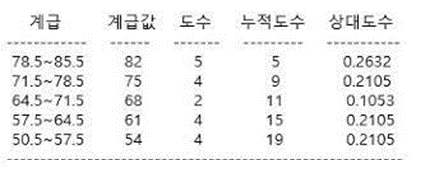

In [10]:
sr_cut = pd.cut(sr, 10).cat.categories

In [11]:
print('계급', '계급값', '도수', '누적도수','','상대도수', sep='\t')
print('='*50)

for a, b, c, d in zip(sr_cut.left, sr_cut.right, sr_cut.value_counts(), pd.cut(sr, 10).cat.categories.value_counts().cumsum()):
    print(a, b, c, d,'', c/10, sep='\t')

계급	계급값	도수	누적도수		상대도수
24.935	31.5	1	1		0.1
31.5	38.0	1	2		0.1
38.0	44.5	1	3		0.1
44.5	51.0	1	4		0.1
51.0	57.5	1	5		0.1
57.5	64.0	1	6		0.1
64.0	70.5	1	7		0.1
70.5	77.0	1	8		0.1
77.0	83.5	1	9		0.1
83.5	90.0	1	10		0.1


8. 국어점수 50점이하 점수에 대한 파이차트로 그리시오.

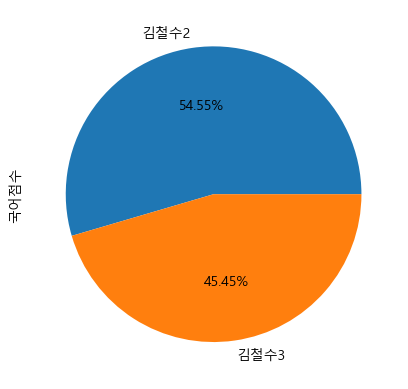

In [12]:
sr[sr<=50].plot(kind='pie', autopct='%.2f%%')
plt.show()


9. 아래처럼 출력하시요( 성과 이름이 분리된 시리즈를 구하고 zip 을이용하여 구하시오.)
```
------------------------
  성     이름    국어
------------------------
  홍     길동    70	 
    ...
  김    철수3   25    

In [13]:
print('성', '이름', '국어', sep='\t')
print('='*25)
for a, b, c in zip(sr.index.str[0], sr.index.str[1:], sr):
    print(a, b, c, sep='\t')

성	이름	국어
홍	길동	90
이	순신	90
임	꺽정	55
정	난정	60
이	이	76
이	황	80
정	도전	76
김	철수1	88
김	철수2	30
김	철수3	25


10. 국어점수 top 5를 구하시오.

In [14]:
sr.nlargest(5, keep='all')

홍길동     90
이순신     90
김철수1    88
이황      80
이이      76
정도전     76
Name: 국어점수, dtype: int64

11. 국어점수가 50점이상인 데이터의 바차트를 그리시오.

<Axes: >

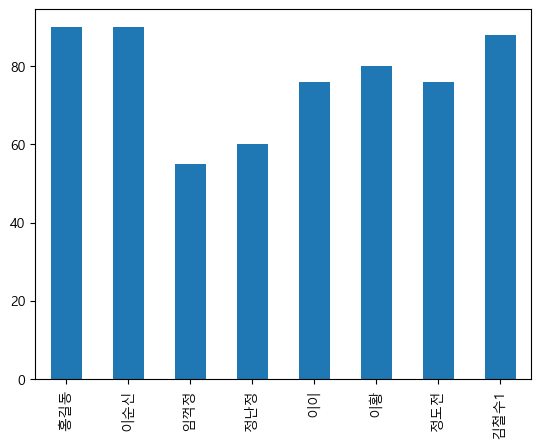

In [15]:
sr[sr>=50].plot(kind='bar')

12. 국어점수의 범위(0~50,50~70,70~100)별 돗수를 구하시오.  
( 범위, 0~50,50~70,70~100)

In [16]:
pd.cut(sr, [0, 50, 70, 100]).value_counts().sort_index()

국어점수
(0, 50]      2
(50, 70]     2
(70, 100]    6
Name: count, dtype: int64

13. 아래처럼 출력하시요(70점이상 합격 미만 불합격)
```
========================
이름     국어   합격여부
=========================
홍길동   90      합격
이순신   90      합격
....


In [17]:
pass_fail = sr.apply(lambda v:'합격' if v>=70 else '불합격')

print('이름', '국어', '합격여부', sep='\t')
print('='*30)
for a, b, c in zip(sr.index, sr, pass_fail):
    print(a, b, c, sep='\t')

이름	국어	합격여부
홍길동	90	합격
이순신	90	합격
임꺽정	55	불합격
정난정	60	불합격
이이	76	합격
이황	80	합격
정도전	76	합격
김철수1	88	합격
김철수2	30	불합격
김철수3	25	불합격
